4G5 Coursework Computer Project: rubber elasticity
====

<!--<img src="./isoprene.png" height=200>-->
<img src="./polyisoprene.png" height=200>

In this project, you are going to investigate the elastic properties of rubber. There are many different types of rubber, both synthetic and
natural, the latter mostly derived from the fluids of the [rubber tree](https://en.wikipedia.org/wiki/Hevea_brasiliensis). All of them have a
common structure: extremely long chains of flexible polymers. Different materials vary in the composition of the polymers, whether and how
cross-linked they are. In this project, we are going to consider the polyisoprene molecule, which is the major constitutent of 
natural rubber. Isoprene is a simple hydrocarbon, a naturally very abundant molecule, even humans produce some! To keep things simple, you
will study only a single polymer chain, and to keep the computational effort low, only a short one. This is already sufficient to display
the main phenomenology of elasticity. 

The main objective of the project is to demonstrate the linear restoring force as a function of displacement for the polyisoprene molecule. 
This will be accomplished by _constrained_ molecular dynamics at constant temperature, in which the two ends of the molecule will be kept at a 
given distance apart, and the molecular motion simulated as it explores the allowable conformations. After sufficient 
data is accumulated, the average force on the end points is recorded, and a new, larger distance is set, repeating the previous procedure. You will
need to use error analysis to determine how long a simulation to do at a fixed displacement before moving on to the next one. 

__Your report__ should contain the measured average restoring force as a function of displacement, with appropriate error bars, and brief commentary on what
you have found. Also consider the average internal energy of molecule (also as a function of displacement), and comment on its relationship to the 
restoring force. 

Notes: 

- If you find that you are spending more than 6 hours on the coursework, seek help. This does _not_ include the runtime of the simulation that you use to gather 
your final data (after you've done shorter exploratory work), it is recommended that you run it overnight. Always make an estimate on how
long a given run will take, never start a simulation for which you have no idea when it will finish!
- Don't forget that the coursework is marked anonymously, so make sure that you include a [coursework cover sheet](http://teaching.eng.cam.ac.uk/node/4171) as the
first page of your report that you upload to Moodle. 
- The marking will be focused on your understanding of the modelling and data analysis, rather than on programming. If you are stuck, seek help.


Preliminaries
----

In [5]:
# Pre - Preliminaries
#!pip install numpy # who hasn't got numpy installed?
!pip install ase
!pip install torchani

In [6]:
#
# import basic atomistic simulation modules
#
import numpy as np
import ase
from ase.build import bulk
from ase.data.pubchem import pubchem_atoms_search
from ase.visualize import view
import matplotlib.pyplot as plt
import pandas as pd 
from statsmodels.tsa.stattools import acf


In [7]:
# get the structure of isoprene
isoprene = pubchem_atoms_search(smiles="CC=C(C)C")
view(isoprene, viewer='x3d')

In [8]:
# import an energy model 
import sys
sys.path.insert(0, "ANI")
import ani

/Users/mac/anaconda3/lib/python3.11/site-packages/torchani/aev.py:16: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")


In [9]:
isoprene.calc = ani.calculator
isoprene.get_potential_energy()

-5346.541799350911

In [10]:
#
# now import the modules we need to run molecular dynamics
#
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase import units
from ase.md.langevin import Langevin
from ase.io.trajectory import Trajectory


In [11]:
# this initialises the velocities by drawing from the appropriate distribution at T=300K
MaxwellBoltzmannDistribution(isoprene, temperature_K=300) 

# We now create a molecular dynamics object that can be used to run Langevin dynamics
# the parameters after the structure are the time step, the temperature, and the friction constant (in units of picoseconds)
dynamics = Langevin(isoprene, temperature_K=300, timestep=0.5*units.fs, friction=0.01) 


# While the dynamics is running, we want to collect some data! This is achieved by creating a function to the dynamics object
# which gets called after some number of steps, and it can report to us what is happenning to the molecule, record its trajectory, etc. 
xyzfile = open('isoprene.xyz', 'w') # the file we are going to record the structures to, the visualiser application "Ovito" can read such XYZ files. 
def report():
    print("Time: {:.3f} fs  |  Potential Energy: {:.3f} eV  |  Kinetic Energy: {:.3f} K".format(dynamics.get_time()/units.fs, isoprene.get_potential_energy(),
        isoprene.get_kinetic_energy()/(len(isoprene)*(3.0/2.0)*units.kB)))
    ase.io.write(xyzfile, isoprene, format="extxyz")

# notice how we print the kinetic energy in units of Kelvin, but it is not the thermodynamic temperature (which is kept constant)

dynamics.attach(report, interval=1) # the interval argument specifies how many steps of dynamics are run between each call to record the trajectory
dynamics.run(100)
xyzfile.close()
del dynamics

# After execution, you will see a new file called "isoprene.xyz". You can look at it, and see what it records. Download it, and view the molecular
# motion using the "Ovito" application. 

Time: 0.000 fs  |  Potential Energy: -5346.542 eV  |  Kinetic Energy: 283.217 K
Time: 0.500 fs  |  Potential Energy: -5346.530 eV  |  Kinetic Energy: 277.325 K
Time: 1.000 fs  |  Potential Energy: -5346.493 eV  |  Kinetic Energy: 253.828 K
Time: 1.500 fs  |  Potential Energy: -5346.443 eV  |  Kinetic Energy: 233.610 K
Time: 2.000 fs  |  Potential Energy: -5346.394 eV  |  Kinetic Energy: 208.551 K
Time: 2.500 fs  |  Potential Energy: -5346.359 eV  |  Kinetic Energy: 190.702 K
Time: 3.000 fs  |  Potential Energy: -5346.341 eV  |  Kinetic Energy: 179.013 K
Time: 3.500 fs  |  Potential Energy: -5346.340 eV  |  Kinetic Energy: 174.974 K
Time: 4.000 fs  |  Potential Energy: -5346.349 eV  |  Kinetic Energy: 177.289 K
Time: 4.500 fs  |  Potential Energy: -5346.359 eV  |  Kinetic Energy: 182.086 K
Time: 5.000 fs  |  Potential Energy: -5346.362 eV  |  Kinetic Energy: 187.270 K
Time: 5.500 fs  |  Potential Energy: -5346.352 eV  |  Kinetic Energy: 183.475 K
Time: 6.000 fs  |  Potential Energy: -53

In [12]:
# Ovito also helps you to select atoms by dragging the "Particles/GLobal Attributes" tab upwards a bit,
# and selecting the little target crosshairs on the left, then clicking on individual atoms. The "ParticleIndex" variable tells you the order
# of the atoms in the file and the ASE atoms object. 

# For example, particle indices 8 and 13 correspond to two H atoms on opposite ends of the isoprene molecule, and we can get their distance:
dr = (isoprene.get_positions()[8,:]-isoprene.get_positions()[13,:])
print("relative displacement vector:", dr)
r = np.linalg.norm(dr)
print("distance: ", r)
dru = dr/np.linalg.norm(dr)
print("unit vector in the same direction:", dru)

relative displacement vector: [ 5.10552723 -0.08840682 -1.06010278]
distance:  5.215174199992295
unit vector in the same direction: [ 0.9789754  -0.01695184 -0.20327275]


Exercise 1 : dynamics and autocorrelation
----

Run molecular dynamics of isoprene, and record the distance between atoms 8 and 13 (two hydrogens) every 10 steps. Plot the time evolution
of this distance, and calculate the autocorrelation function. Run the trajectory long enough that you sample the methyl groups rotating around
the C-C bond. Repeat the exercise at higher temperature (e.g. 500 K), what happens to the autocorrelation function ? 

Note: you can calculate the autocorrelation yourself, or learn to use the `acf` function in  `statsmodels.tsa.stattools`

In [13]:
# --------------------------------- Initial Notes ---------------------------------
'''

We need to:
1. run molecular dynamics of isoprene
2. record the distance between atoms 8 and 13 every 10 steps 
3. plot the time evolution of this distance
4. calculate the autocorrelation function (on what)

Initial Notes

We have the code which currently:
- initialises velocity of molecules and particles
- creates the molecular dynamics object
- have a 'report' function which gets called after a certain number of steps to report
- dynamics.run(100): runs 100 steps of our molecular simulation
- dynamics.attach(report, interval = n): reports every n steps of our simulation
- .get_positions()[k,:] gets the position (in 3-dimensions) of our atoms in our molecules

- we need to investigate the acf function 


- first steps - lets run the dynamics and report every 10 time steps the distance between the two atoms

'''
# --------------------------------- Initial Code ---------------------------------


# this initialises the velocities by drawing from the appropriate distribution at T=300K
MaxwellBoltzmannDistribution(isoprene, temperature_K=300) 

# We now create a molecular dynamics object that can be used to run Langevin dynamics
# the parameters after the structure are the time step, the temperature, and the friction constant (in units of picoseconds)
dynamics = Langevin(isoprene, temperature_K=300, timestep=0.5*units.fs, friction=0.01) 

xyz_file = open('exercise_1_300K.xyz', 'w')

distance_df_300 = []
full_distance_df_300 = []

def report():

    pos_8 = isoprene.get_positions()[8,:] # retrieve position 8
    pos_13 = isoprene.get_positions()[13,:] # retrieve position 13

    distance = pos_8 - pos_13 # find distance (3 dim vector)
    scalar_distance = np.linalg.norm(distance) # norm of distance (1 dim)

    distance_df_300.append(scalar_distance) # add to list of values for plotting
    full_distance_df_300.append(distance) # add to list of values for plotting

    # maybe you don't wanna see this - looks kinda cool tho
    print("Time: {:.3f} fs  |  Potential Energy: {:.3f} eV  |  Kinetic Energy: {:.3f} K | Distance btw. atoms 8 and 13: {:.3f}".format(
        dynamics.get_time()/units.fs, isoprene.get_potential_energy(),
        isoprene.get_kinetic_energy()/(len(isoprene)*(3.0/2.0)*units.kB), 
        scalar_distance))
    
    # writes to the xyz file
    ase.io.write(xyz_file, isoprene, format="extxyz")


dynamics.attach(report, interval = 10)
dynamics.run(1000)

xyzfile.close()
del dynamics

# Convert data into Pandas DataFrame for analysis
df_300 = pd.DataFrame(full_distance_df_300, columns=['dx', 'dy', 'dz'])
df_300['distance'] = distance_df_300

Time: 0.000 fs  |  Potential Energy: -5346.248 eV  |  Kinetic Energy: 306.379 K | Distance btw. atoms 8 and 13: 5.215
Time: 5.000 fs  |  Potential Energy: -5346.140 eV  |  Kinetic Energy: 257.277 K | Distance btw. atoms 8 and 13: 5.148
Time: 10.000 fs  |  Potential Energy: -5346.148 eV  |  Kinetic Energy: 265.564 K | Distance btw. atoms 8 and 13: 5.139
Time: 15.000 fs  |  Potential Energy: -5346.137 eV  |  Kinetic Energy: 264.942 K | Distance btw. atoms 8 and 13: 5.204
Time: 20.000 fs  |  Potential Energy: -5346.118 eV  |  Kinetic Energy: 267.079 K | Distance btw. atoms 8 and 13: 5.225
Time: 25.000 fs  |  Potential Energy: -5346.163 eV  |  Kinetic Energy: 305.498 K | Distance btw. atoms 8 and 13: 5.219
Time: 30.000 fs  |  Potential Energy: -5346.166 eV  |  Kinetic Energy: 320.270 K | Distance btw. atoms 8 and 13: 5.193
Time: 35.000 fs  |  Potential Energy: -5346.153 eV  |  Kinetic Energy: 311.502 K | Distance btw. atoms 8 and 13: 5.250
Time: 40.000 fs  |  Potential Energy: -5345.954 eV

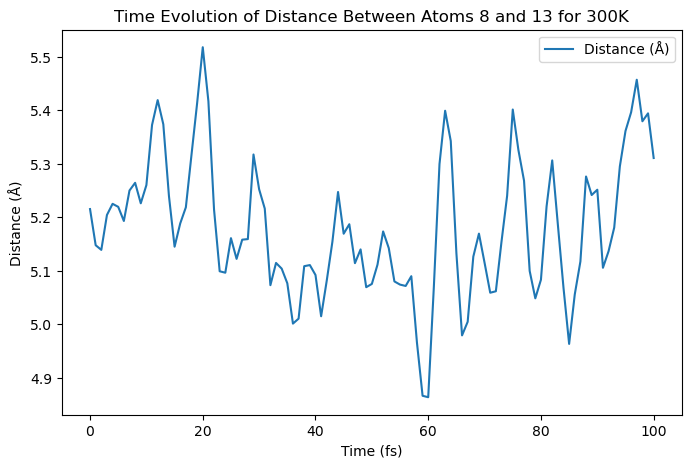

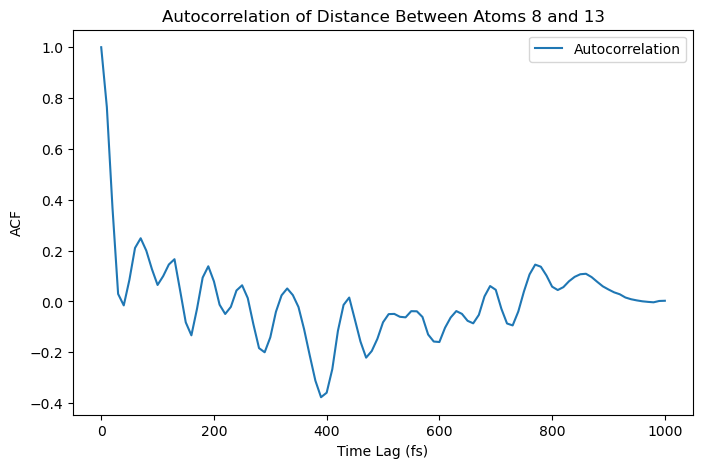

In [16]:
# ---- 📌 PLOTTING TIME EVOLUTION OF DISTANCE ----
plt.figure(figsize=(8, 5))
plt.plot(df_300['distance'], label="Distance (Å)")
plt.xlabel("Time (fs)")
plt.ylabel("Distance (Å)")
plt.title("Time Evolution of Distance Between Atoms 8 and 13 for 300K")
plt.legend()
plt.show()

# ---- 📌 COMPUTE AND PLOT AUTOCORRELATION FUNCTION (ACF) ----
acf_values = acf(df_300['distance'], nlags=100, fft=True)  # Compute ACF with FFT
lags = np.arange(len(acf_values)) * 10  # Convert index to time lag (fs)

plt.figure(figsize=(8, 5))
plt.plot(lags, acf_values, label="Autocorrelation")
plt.xlabel("Time Lag (fs)")
plt.ylabel("ACF")
plt.title("Autocorrelation of Distance Between Atoms 8 and 13")
plt.legend()
plt.show()

In [17]:
# --------------------------------- Initial Notes ---------------------------------
'''

We need to:
1. run molecular dynamics of isoprene
2. record the distance between atoms 8 and 13 every 10 steps 
3. plot the time evolution of this distance
4. calculate the autocorrelation function (on what)

Initial Notes

We have the code which currently:
- initialises velocity of molecules and particles
- creates the molecular dynamics object
- have a 'report' function which gets called after a certain number of steps to report
- dynamics.run(100): runs 100 steps of our molecular simulation
- dynamics.attach(report, interval = n): reports every n steps of our simulation
- .get_positions()[k,:] gets the position (in 3-dimensions) of our atoms in our molecules

- we need to investigate the acf function 


- first steps - lets run the dynamics and report every 10 time steps the distance between the two atoms

'''
# --------------------------------- Initial Code ---------------------------------


# this initialises the velocities by drawing from the appropriate distribution at T=500K
MaxwellBoltzmannDistribution(isoprene, temperature_K=500) 

# We now create a molecular dynamics object that can be used to run Langevin dynamics
# the parameters after the structure are the time step, the temperature, and the friction constant (in units of picoseconds)
dynamics = Langevin(isoprene, temperature_K=500, timestep=0.5*units.fs, friction=0.01) 

xyz_file = open('exercise_1_500K.xyz', 'w')

distance_df_500 = []
full_distance_df_500 = []

def report():

    pos_8 = isoprene.get_positions()[8,:] # retrieve position 8
    pos_13 = isoprene.get_positions()[13,:] # retrieve position 13

    distance = pos_8 - pos_13 # find distance (3 dim vector)
    scalar_distance = np.linalg.norm(distance) # norm of distance (1 dim)

    distance_df_500.append(scalar_distance) # add to list of values for plotting
    full_distance_df_500.append(distance) # add to list of values for plotting

    # maybe you don't wanna see this - looks kinda cool tho
    print("Time: {:.3f} fs  |  Potential Energy: {:.3f} eV  |  Kinetic Energy: {:.3f} K | Distance btw. atoms 8 and 13: {:.3f}".format(
        dynamics.get_time()/units.fs, isoprene.get_potential_energy(),
        isoprene.get_kinetic_energy()/(len(isoprene)*(3.0/2.0)*units.kB), 
        scalar_distance))
    
    # writes to the xyz file
    ase.io.write(xyz_file, isoprene, format="extxyz")


dynamics.attach(report, interval = 10)
dynamics.run(1000)

xyzfile.close()
del dynamics

# Convert data into Pandas DataFrame for analysis
df_500 = pd.DataFrame(full_distance_df_500, columns=['dx', 'dy', 'dz'])
df_500['distance'] = distance_df_500

Time: 0.000 fs  |  Potential Energy: -5346.064 eV  |  Kinetic Energy: 570.446 K | Distance btw. atoms 8 and 13: 5.311
Time: 5.000 fs  |  Potential Energy: -5345.833 eV  |  Kinetic Energy: 452.444 K | Distance btw. atoms 8 and 13: 5.334
Time: 10.000 fs  |  Potential Energy: -5346.119 eV  |  Kinetic Energy: 592.290 K | Distance btw. atoms 8 and 13: 5.300
Time: 15.000 fs  |  Potential Energy: -5345.854 eV  |  Kinetic Energy: 465.142 K | Distance btw. atoms 8 and 13: 5.462
Time: 20.000 fs  |  Potential Energy: -5345.932 eV  |  Kinetic Energy: 497.763 K | Distance btw. atoms 8 and 13: 5.466
Time: 25.000 fs  |  Potential Energy: -5345.805 eV  |  Kinetic Energy: 434.168 K | Distance btw. atoms 8 and 13: 5.499
Time: 30.000 fs  |  Potential Energy: -5345.853 eV  |  Kinetic Energy: 463.910 K | Distance btw. atoms 8 and 13: 5.372
Time: 35.000 fs  |  Potential Energy: -5345.698 eV  |  Kinetic Energy: 391.294 K | Distance btw. atoms 8 and 13: 5.286
Time: 40.000 fs  |  Potential Energy: -5345.841 eV

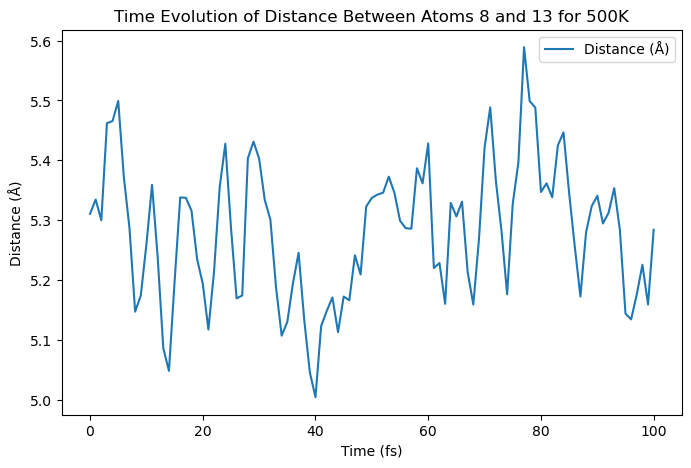

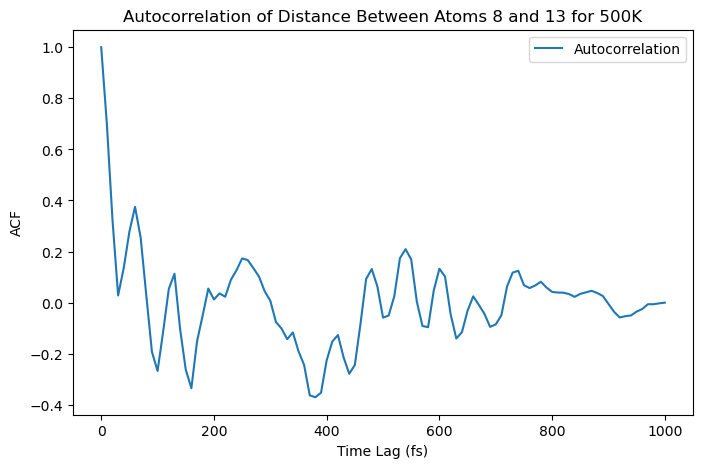

In [18]:
# ---- 📌 PLOTTING TIME EVOLUTION OF DISTANCE ----
plt.figure(figsize=(8, 5))
plt.plot(df_500['distance'], label="Distance (Å)")
plt.xlabel("Time (fs)")
plt.ylabel("Distance (Å)")
plt.title("Time Evolution of Distance Between Atoms 8 and 13 for 500K")
plt.legend()
plt.show()

# ---- 📌 COMPUTE AND PLOT AUTOCORRELATION FUNCTION (ACF) ----
acf_values = acf(df_500['distance'], nlags=100, fft=True)  # Compute ACF with FFT
lags = np.arange(len(acf_values)) * 10  # Convert index to time lag (fs)

plt.figure(figsize=(8, 5))
plt.plot(lags, acf_values, label="Autocorrelation")
plt.xlabel("Time Lag (fs)")
plt.ylabel("ACF")
plt.title("Autocorrelation of Distance Between Atoms 8 and 13 for 500K")
plt.legend()
plt.show()

### What do we find?

For 500K, we see that the autocorrelation osciallates between 0.2 and -0.2 after decreasing from 1 as we increase our time lag. We see that the distance spikes up and down around an average of around 4.6. 

For 300K CONTINUE THIS

Polyisoprene
---

In [19]:
# we now create a polyisoprene molecule
polyisoprene = pubchem_atoms_search(smiles="CC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)C")
view(polyisoprene, viewer='x3d')

/Users/mac/anaconda3/lib/python3.11/site-packages/ase/data/pubchem.py:80: UserWarning: The structure "CC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)C" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  warnings.warn(


Exercise 2: fixing atoms
---
If you create a dynamics object from an atoms object that has a constraint set, the dynamics will obey that constraint. Run a short dynamics
trajectory of polyisoprene with the constraint below, and verify with Ovito that indeed the selected atoms are not moving. 

In [20]:
# we will need the ability to run molecular dynamics with constraints: the positions of two atoms at the ends of the molecule should be fixed
# the following module enables this
from ase.constraints import FixAtoms

# suppose we have identified that the atoms with indices 27 and 29 are the ones we are going to held fixed, the following
# command achieves this:
polyisoprene.set_constraint(FixAtoms(indices=[27,29]) )

polyisoprene.calc = ani.calculator


In [21]:
# ---------------  Molecular Dynamics Experiment --------

# this initialises the velocities by drawing from the appropriate distribution at T=500K
MaxwellBoltzmannDistribution(polyisoprene, temperature_K=300) 

# We now create a molecular dynamics object that can be used to run Langevin dynamics
# the parameters after the structure are the time step, the temperature, and the friction constant (in units of picoseconds)
dynamics = Langevin(polyisoprene, temperature_K=300, timestep=0.5*units.fs, friction=0.01) 

xyz_file = open('exercise_2_polyisoprene.xyz', 'w')

distance_df_atoms27and29 = []
full_distance_df_atoms27and29 = []

def report():

    pos_27 = polyisoprene.get_positions()[27,:] # retrieve position 8
    pos_29 = polyisoprene.get_positions()[29,:] # retrieve position 13

    distance = pos_27 - pos_29 # find distance (3 dim vector)
    scalar_distance = np.linalg.norm(distance) # norm of distance (1 dim)

    distance_df_atoms27and29.append(scalar_distance) # add to list of values for plotting
    full_distance_df_atoms27and29.append(distance) # add to list of values for plotting

    # maybe you don't wanna see this - looks kinda cool tho
    print("Time: {:.3f} fs  |  Potential Energy: {:.3f} eV  |  Kinetic Energy: {:.3f} K | Distance btw. atoms 27 and 29: {:.3f}".format(
        dynamics.get_time()/units.fs, polyisoprene.get_potential_energy(),
        polyisoprene.get_kinetic_energy()/(len(polyisoprene)*(3.0/2.0)*units.kB), 
        scalar_distance))
    
    # writes to the xyz file
    ase.io.write(xyz_file, polyisoprene, format="extxyz")


dynamics.attach(report, interval = 10)
dynamics.run(1000)

xyzfile.close()
del dynamics

Time: 0.000 fs  |  Potential Energy: -31916.800 eV  |  Kinetic Energy: 338.665 K | Distance btw. atoms 27 and 29: 6.369
Time: 5.000 fs  |  Potential Energy: -31915.301 eV  |  Kinetic Energy: 190.310 K | Distance btw. atoms 27 and 29: 6.369
Time: 10.000 fs  |  Potential Energy: -31915.792 eV  |  Kinetic Energy: 244.270 K | Distance btw. atoms 27 and 29: 6.369
Time: 15.000 fs  |  Potential Energy: -31915.412 eV  |  Kinetic Energy: 210.862 K | Distance btw. atoms 27 and 29: 6.369
Time: 20.000 fs  |  Potential Energy: -31915.374 eV  |  Kinetic Energy: 209.046 K | Distance btw. atoms 27 and 29: 6.369
Time: 25.000 fs  |  Potential Energy: -31915.234 eV  |  Kinetic Energy: 196.547 K | Distance btw. atoms 27 and 29: 6.369
Time: 30.000 fs  |  Potential Energy: -31915.073 eV  |  Kinetic Energy: 182.129 K | Distance btw. atoms 27 and 29: 6.369
Time: 35.000 fs  |  Potential Energy: -31915.488 eV  |  Kinetic Energy: 222.529 K | Distance btw. atoms 27 and 29: 6.369
Time: 40.000 fs  |  Potential Ener

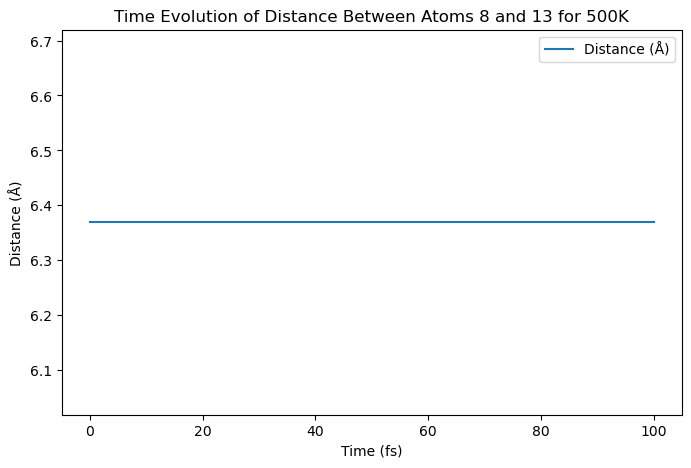

In [22]:
# ---- 📌 PLOTTING TIME EVOLUTION OF DISTANCE BETWEEN THE TWO FIXED MOLECULES ----
plt.figure(figsize=(8, 5))
plt.plot(distance_df_atoms27and29, label="Distance (Å)")
plt.xlabel("Time (fs)")
plt.ylabel("Distance (Å)")
plt.title("Time Evolution of Distance Between Atoms 8 and 13 for 500K")
plt.legend()
plt.show()

Looks pretty fixed to me lol! ❤️

Exercise 3: stretching
----

Similarly to the reporting function above, we can create a function that stretches the molecule, by simply moving one of the "fixed" atoms by a
small amount, thus increasing the distance between our "fixed" atoms. Write a function that:
- calculates the distance between the atoms,
- calculate the new position of one of the fixed atoms, so that it is slightly further away
- sets that new position for your fixed atom

You can either :

1. attach this function to the dynamics object (you can attach multiple functions to a dynamics object), and call it frequently, so the stretching is "continuous"
1. run the dynamics for a set number of steps, then call your function, and run the dynamics again for a set number of steps, etc. you can either call your stretching
function "by hand", outside the dynamics run, or attach your function to the dynamics but only have it be called very infrequently. 

Obviously, if you choose method 1 the stretch amount has to be much much smaller than in method 2 for an equivalent overall stretch rate, because it is being applied much more frequently. 
Test your setup by running a short dynamics. Initially, make the distance adjustments frequent and large (e.g. 2%) so that you can see that it is being done correctly by inspecting your short trajectory in Ovito. 

In [24]:
# ---------------  Stretching Dynamics Experiment --------

# parameters
stretching_constant = 0.01  # Scaling factor for stretching
stretch_interval = 500  # Stretch every 500 steps
output_file = 'exercise_3_polyisoprene.xyz'  # Output file for visualization

# Open XYZ file for writing
xyz_file = open(output_file, 'w')

distance_df_atoms27and29 = []
full_distance_df_atoms27and29 = []

def report():
    """
    Records simulation data, including atom positions and distances, 
    and writes to an XYZ file for visualization.
    """
    pos_27 = polyisoprene.get_positions()[27, :]  # Retrieve position of atom 27
    pos_29 = polyisoprene.get_positions()[29, :]  # Retrieve position of atom 29

    distance = pos_27 - pos_29  # Compute distance vector
    scalar_distance = np.linalg.norm(distance)  # Compute scalar distance

    distance_df_atoms27and29.append(scalar_distance)  # Store scalar distance
    full_distance_df_atoms27and29.append(distance)  # Store full vector distance

    print("Time: {:.3f} fs  |  Potential Energy: {:.3f} eV  |  Kinetic Energy: {:.3f} K | Distance btw. atoms 27 and 29: {:.3f}".format(
        dynamics.get_time() / units.fs, polyisoprene.get_potential_energy(),
        polyisoprene.get_kinetic_energy() / (len(polyisoprene) * (3.0 / 2.0) * units.kB), 
        scalar_distance
    ))

    # Write to XYZ file for visualization
    ase.io.write(xyz_file, polyisoprene, format="extxyz")

def stretch_func(dynamics, atom_index):
    """
    Function to stretch the molecule by slightly increasing the distance
    between two fixed atoms in the polyisoprene molecule.
    """
    idx1, idx2 = atom_index  # Atom indices for stretching

    pos_idx1 = polyisoprene.get_positions()[idx1, :]  # Retrieve position of atom 1
    pos_idx2 = polyisoprene.get_positions()[idx2, :]  # Retrieve position of atom 2

    distance_vector = pos_idx1 - pos_idx2  # Compute displacement vector
    scalar_distance = np.linalg.norm(distance_vector)  # Compute scalar distance

    # Compute new position for idx1 by extending the vector
    new_pos_idx1 = pos_idx2 + (1 + stretching_constant) * distance_vector

    # Update the atom's position
    polyisoprene.positions[idx1] = new_pos_idx1

    print(f"Stretched atoms {idx1} and {idx2} | New distance: {np.linalg.norm(new_pos_idx1 - pos_idx2):.3f}")

# Initialize molecular dynamics with stretching
dynamics = Langevin(polyisoprene, temperature_K=300, timestep=0.5 * units.fs, friction=0.01)

# Attach report function for tracking and visualization
dynamics.attach(report, interval=10)

# Attach stretching function to be executed at a set interval
dynamics.attach(stretch_func, interval=stretch_interval, dynamics=dynamics, atom_index=(27, 29))

# Run the dynamics simulation with stretching
dynamics.run(10000)  # Run for 10,000 steps

# Close XYZ file
xyz_file.close()

# Cleanup
del dynamics


Time: 0.000 fs  |  Potential Energy: -31913.735 eV  |  Kinetic Energy: 254.358 K | Distance btw. atoms 27 and 29: 7.850
Stretched atoms 27 and 29 | New distance: 7.928
Time: 5.000 fs  |  Potential Energy: -31913.108 eV  |  Kinetic Energy: 271.937 K | Distance btw. atoms 27 and 29: 7.928
Time: 10.000 fs  |  Potential Energy: -31914.095 eV  |  Kinetic Energy: 362.712 K | Distance btw. atoms 27 and 29: 7.928
Time: 15.000 fs  |  Potential Energy: -31913.753 eV  |  Kinetic Energy: 337.710 K | Distance btw. atoms 27 and 29: 7.928
Time: 20.000 fs  |  Potential Energy: -31914.213 eV  |  Kinetic Energy: 383.130 K | Distance btw. atoms 27 and 29: 7.928
Time: 25.000 fs  |  Potential Energy: -31914.570 eV  |  Kinetic Energy: 407.980 K | Distance btw. atoms 27 and 29: 7.928
Time: 30.000 fs  |  Potential Energy: -31913.995 eV  |  Kinetic Energy: 349.308 K | Distance btw. atoms 27 and 29: 7.928
Time: 35.000 fs  |  Potential Energy: -31913.286 eV  |  Kinetic Energy: 291.686 K | Distance btw. atoms 27 

Main Task
---
Create a moleculary dynamics simulation in which you stretch the molecule very slowly, and measure the restoring force as a function
of displacement (I suggest using method 2 from above). 
Notes: 
- You are  interested in the force _between_ the two molecules held fixed (i.e. the force difference) and only in the component of the force along
the line connecting the two fixed atoms. 
- It is enough to record the structure every 100 steps or so, and be prepared to run the simulation for 100,000 steps or more for each fixed distance.
- I recommend that you create and record the trajectory first, and the analyse it afterwards, because the main computational cost is creating the trajectory. 
- When analysing the data, do not include data immediately after each stretch, allow the system to relax towards the equilibrium distribution for a few
thousand steps before collecting the force data.
- Calculate the autocorrelation of the restoring force value and use it to compute error bars on your measurement

In [32]:
# ---------------  Main Task: Slow Stretching, Energy & Force Analysis --------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ase import units
from ase.md.langevin import Langevin
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
import ase.io

# Stretching parameters
stretching_constant = 0.005  # Small incremental stretch per step
stretch_interval = 500  # Stretch every 500 steps
equilibration_steps = 5000  # Steps to wait after each stretch before collecting force data
data_collection_steps = 10000  # Steps for force measurement after equilibration

# Output file for visualization
xyz_file = open('main_task_polyisoprene.xyz', 'w')

# Data storage
force_data = []
distance_data = []
kinetic_energy_data = []
potential_energy_data = []

def compute_restoring_force():
    """Compute the force component along the stretch direction."""
    pos_27 = polyisoprene.get_positions()[27, :]
    pos_29 = polyisoprene.get_positions()[29, :]

    # Compute displacement vector and unit direction vector
    displacement_vector = pos_27 - pos_29
    distance_scalar = np.linalg.norm(displacement_vector)
    
    if distance_scalar == 0:
        raise ValueError("Atoms 27 and 29 have zero separation! Check simulation setup.")
    
    unit_direction = displacement_vector / distance_scalar

    # Compute force projection along this direction
    forces = polyisoprene.get_forces()
    force_27 = np.dot(forces[27], unit_direction)
    force_29 = np.dot(forces[29], unit_direction)

    restoring_force = force_27 - force_29  # Force difference

    return distance_scalar, restoring_force

def report():
    """Record system state, energy, and force, then write trajectory for visualization."""
    distance, force = compute_restoring_force()
    kinetic_energy = polyisoprene.get_kinetic_energy()
    potential_energy = polyisoprene.get_potential_energy()

    # Store data
    distance_data.append(distance)
    force_data.append(force)
    kinetic_energy_data.append(kinetic_energy)
    potential_energy_data.append(potential_energy)

    print(f"Time: {dynamics.get_time()/units.fs:.3f} fs | Distance: {distance:.3f} Å | "
          f"Force: {force:.3f} eV/Å | KE: {kinetic_energy:.3f} eV | PE: {potential_energy:.3f} eV")

    # Save trajectory for visualization
    ase.io.write(xyz_file, polyisoprene, format="extxyz")

def stretch_func(dynamics, atom_index):
    """Stretch the molecule very slowly."""
    idx1, idx2 = atom_index

    pos_idx1 = polyisoprene.get_positions()[idx1, :]
    pos_idx2 = polyisoprene.get_positions()[idx2, :]

    distance_vector = pos_idx1 - pos_idx2
    new_pos_idx1 = pos_idx2 + (1 + stretching_constant) * distance_vector

    polyisoprene.positions[idx1] = new_pos_idx1

    print(f"Stretched atoms {idx1} and {idx2} | New distance: {np.linalg.norm(new_pos_idx1 - pos_idx2):.3f}")

# Initialize molecular dynamics
MaxwellBoltzmannDistribution(polyisoprene, temperature_K=300)
dynamics = Langevin(polyisoprene, temperature_K=300, timestep=0.5 * units.fs, friction=0.01)

# Attach functions
dynamics.attach(report, interval=100)
dynamics.attach(stretch_func, interval=stretch_interval, dynamics=dynamics, atom_index=(27, 29))

# Run the simulation
dynamics.run(equilibration_steps)  # Equilibrate before recording
dynamics.run(data_collection_steps)  # Collect data

# Close file
xyz_file.close()
del dynamics


Time: 0.000 fs | Distance: 10.850 Å | Force: 0.000 eV/Å | KE: 3.550 eV | PE: -31914.371 eV
Stretched atoms 27 and 29 | New distance: 10.904
Time: 50.000 fs | Distance: 10.904 Å | Force: 0.000 eV/Å | KE: 3.340 eV | PE: -31914.081 eV
Time: 100.000 fs | Distance: 10.904 Å | Force: 0.000 eV/Å | KE: 3.343 eV | PE: -31914.183 eV
Time: 150.000 fs | Distance: 10.904 Å | Force: 0.000 eV/Å | KE: 3.328 eV | PE: -31914.178 eV
Time: 200.000 fs | Distance: 10.904 Å | Force: 0.000 eV/Å | KE: 3.199 eV | PE: -31914.218 eV
Time: 250.000 fs | Distance: 10.904 Å | Force: 0.000 eV/Å | KE: 3.274 eV | PE: -31914.427 eV
Stretched atoms 27 and 29 | New distance: 10.958
Time: 300.000 fs | Distance: 10.958 Å | Force: 0.000 eV/Å | KE: 2.951 eV | PE: -31914.241 eV
Time: 350.000 fs | Distance: 10.958 Å | Force: 0.000 eV/Å | KE: 2.920 eV | PE: -31914.250 eV
Time: 400.000 fs | Distance: 10.958 Å | Force: 0.000 eV/Å | KE: 2.978 eV | PE: -31914.371 eV
Time: 450.000 fs | Distance: 10.958 Å | Force: 0.000 eV/Å | KE: 3.07

KeyboardInterrupt: 

In [31]:
import ase.io
import numpy as np

# Load a frame from the trajectory file
frame = ase.io.read("main_task_polyisoprene.xyz", index=0)

# Get atom positions
pos_27 = frame.get_positions()[27, :]
pos_29 = frame.get_positions()[29, :]

# Compute the displacement vector and unit direction vector
displacement_vector = pos_27 - pos_29
distance_scalar = np.linalg.norm(displacement_vector)

# Ensure we don't divide by zero
if distance_scalar == 0:
    raise ValueError("Atoms 27 and 29 have zero separation! Check simulation setup.")

dru = displacement_vector / distance_scalar  # Unit vector

# Get force vectors in 3D
force_27 = frame.get_forces()[27, :]
force_29 = frame.get_forces()[29, :]

# Compute force projections onto the stretch direction
proj_27 = np.dot(force_27, dru)  # Correctly extracts only the component along stretch
proj_29 = np.dot(force_29, dru)

# Compute restoring force as the difference
restoring_force = proj_27 - proj_29

# Print results for verification
print(f"Displacement vector: {displacement_vector}")
print(f"Unit vector (dru): {dru}")
print(f"Force on atom 27: {force_27}")
print(f"Force on atom 29: {force_29}")
print(f"Force projection (Atom 27): {proj_27}")
print(f"Force projection (Atom 29): {proj_29}")
print(f"Corrected Restoring Force: {restoring_force}")


Displacement vector: [-5.92328000e-03  3.59573508e+00  8.98060465e+00]
Unit vector (dru): [-6.12307158e-04  3.71701883e-01  9.28351946e-01]
Force on atom 27: [-0.83584237 -3.4116981  -7.0233798 ]
Force on atom 29: [-1.06457746 -2.27676034 -0.08787322]
Force projection (Atom 27): -7.787791119044342
Force projection (Atom 29): -0.9272015317127055
Corrected Restoring Force: -6.860589587331637


In [ ]:

# Store results in a dataframe and save to CSV
df = pd.DataFrame({
    'Distance (Å)': distance_data,
    'Force (eV/Å)': force_data,
    'Kinetic Energy (eV)': kinetic_energy_data,
    'Potential Energy (eV)': potential_energy_data
})
df.to_csv("force_energy_displacement_data.csv", index=False)

# Compute error bars using autocorrelation
from statsmodels.tsa.stattools import acf

def compute_error_bars(data):
    """Calculate standard error considering autocorrelation."""
    autocorr = acf(data, nlags=100, fft=True)
    correlation_time = 1 + 2 * np.sum(autocorr)
    Neff = len(data) / correlation_time
    error = np.std(data) / np.sqrt(Neff)
    return error

error_force = compute_error_bars(force_data)

# Plot force vs. displacement with error bars
plt.figure(figsize=(8, 5))
plt.errorbar(df["Distance (Å)"], df["Force (eV/Å)"], yerr=error_force, fmt='o-', capsize=3, label="Restoring Force")
plt.xlabel("Displacement (Å)")
plt.ylabel("Force (eV/Å)")
plt.title("Restoring Force vs. Displacement")
plt.legend()
plt.grid()
plt.show()

# Plot kinetic and potential energy vs. displacement
plt.figure(figsize=(8, 5))
plt.plot(df["Distance (Å)"], df["Kinetic Energy (eV)"], 'r-', label="Kinetic Energy")
plt.plot(df["Distance (Å)"], df["Potential Energy (eV)"], 'b-', label="Potential Energy")
plt.xlabel("Displacement (Å)")
plt.ylabel("Energy (eV)")
plt.title("Kinetic and Potential Energy vs. Displacement")
plt.legend()
plt.grid()
plt.show()

# Gaussian Processes btfo

In [ ]:
# --------------- Gaussian Process Model for Force Prediction --------

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Load the dataset from previous simulation
df = pd.read_csv("force_energy_displacement_data.csv")

# Define Gaussian Process model
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)  # Radial Basis Function Kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Reshape data for GP model
X = df["Distance (Å)"].values.reshape(-1, 1)
y = df["Force (eV/Å)"].values

# Train the Gaussian Process model
gp.fit(X, y)

# Generate test points for smooth predictions
X_test = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Plot the Gaussian Process fit
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'bo', label="Simulated Data")
plt.plot(X_test, y_pred, 'r-', label="Gaussian Process Fit")
plt.fill_between(X_test.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color='r', alpha=0.2, label="Confidence Interval")
plt.xlabel("Displacement (Å)")
plt.ylabel("Force (eV/Å)")
plt.title("Gaussian Process Fit to Force-Displacement Data")
plt.legend()
plt.grid()
plt.show()


[0.232742628355887,
 0.9060365246513135,
 1.7297240551627888,
 2.3830171460086333,
 2.5593909972639217,
 2.5268938299882686,
 2.2939102233874356,
 1.5320556129475706,
 0.4869877300856492,
 -0.3709680501412855,
 -1.1256226542528986,
 -1.8362550453572,
 -2.3628193828940853,
 -2.715323465786733,
 -2.898703854479224,
 -2.9783705392176687,
 -2.9315361436394167,
 -2.768305978325616,
 -2.353153563698507,
 -1.8026879981881234,
 -1.0665166264412729,
 -0.34009708301300173,
 0.43745349355774166,
 1.3472192536200671,
 2.32957607068286,
 2.673220862562164,
 2.825747019432605,
 2.7785490306201264,
 2.2596324935792924,
 1.5799904290938398,
 0.9477139076113759,
 0.3051679540382948,
 -0.2164944171335476,
 -0.6404827702238757,
 -1.0222110888861622,
 -1.2601343692444305,
 -1.415402431949307,
 -1.511443787139312,
 -1.5201560069084774,
 -1.3212835882529708,
 -1.0385051606687155,
 -0.6203352549749687,
 -0.04938755893349081,
 0.5816144363776504,
 1.2313267960832672,
 1.9756764818034072,
 2.314041447064134,
 

Optional extension
---

The fact that the restoring force is entropic in origin has implications for the temperature dependence of the restoring force. Repeat the main task for
different temperature settings of the Langevin dynamics, and compare the results!